In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt


In [2]:
'''def grad_f(xp):
    x, y, z = xp
    df_dx = -312 * x**2 * (y - x**3) + 104 * (x - z**3) + 2 * x - 4
    df_dy = -312 * y**2 * (z - y**3) + 104 * (y - x**3) + 2 * y - 4
    df_dz = -312 * z**2 * (x - z**3) + 104 * (z - y**3) + 2 * z - 4
    return np.array([df_dx, df_dy, df_dz])'''

'def grad_f(xp):\n    x, y, z = xp\n    df_dx = -312 * x**2 * (y - x**3) + 104 * (x - z**3) + 2 * x - 4\n    df_dy = -312 * y**2 * (z - y**3) + 104 * (y - x**3) + 2 * y - 4\n    df_dz = -312 * z**2 * (x - z**3) + 104 * (z - y**3) + 2 * z - 4\n    return np.array([df_dx, df_dy, df_dz])'

In [3]:
def grad_f(xp, f, tol=1e-10):
    x, y, z = xp
    df_dx = (f(np.array([x +  tol, y , z])) - f(xp))/tol
    df_dy = (f(np.array([x, y + tol, z])) - f(xp))/tol
    df_dz = (f(np.array([x, y, z + tol])) - f(xp))/tol
    return np.array([df_dx, df_dy, df_dz])

In [4]:
def golden_section_search(f, a, b, tol=1e-5, max_iter=100): 
    """
    Метод золотого сечения для поиска минимума функции.

    :param f: Целевая функция.
    :param a: Левая граница отрезка.
    :param b: Правая граница отрезка.
    :param tol: Допустимая точность.
    :param max_iter: Максимальное количество итераций.
    :return: Приблизительное значение точки минимума.
    """
    phi = (1 + 5**0.5) / 2  # Число золотого сечения
    resphi = 2 - phi  # 1/phi^2
    
    # Начальные точки
    x1 = a + resphi * (b - a)
    x2 = b - resphi * (b - a)
    f1 = f(x1)
    f2 = f(x2)
    for _ in range(max_iter):
        if abs(b - a) < tol:
            break
        if f1 < f2:
            b, x2, f2 = x2, x1, f1
            x1 = a + resphi * (b - a)
            f1 = f(x1)
        else:
            a, x1, f1 = x1, x2, f2
            x2 = b - resphi * (b - a)
            f2 = f(x2)
    

    return (a + b) / 2  # Возвращаем центр оставшегося интервала

def target_function(xp):
            x, y, z = xp
            return (x - 2)**2 + 52*(y - x**3)**2 + (y - 2)**2 + 52*(z - y**3)**2 + (z - 2)**2 + 52*(x - z**3)**2

def norm(xp):
    x, y, z = xp
    return np.sqrt(x**2 + y**2 + z**2)

def conjugate_gradient(x0, tol=1e-9, max_iter=1000, lr=0.0002, stop = 0):
    x_base = x0
    d_base = -1* grad_f(x_base, target_function)
    iter = 0

    if stop == 0:
        while ((norm(d_base) > tol) and (iter < max_iter)):
            def target_function_for_golden(alpha):
                x, y, z = x_base
                x = x + d_base[0] * alpha
                y = y + d_base[1] * alpha
                z = z + d_base[2] * alpha
                return (x - 2)**2 + 52*(y - x**3)**2 + (y - 2)**2 + 52*(z - y**3)**2 + (z - 2)**2 + 52*(x - z**3)**2
            

            alpha = golden_section_search(target_function_for_golden, -lr, lr)

            x_new = x_base + alpha*d_base
            beta =  norm(grad_f(x_new, target_function))**2/norm(grad_f(x_base, target_function))**2

            d_new = -1*(grad_f(x_new, target_function)) + beta*d_base
            d_base = d_new
            x_base = x_new
            iter = iter + 1
    else:
        x_new = x_base*10000000000
        while ((iter < max_iter) and (norm(x_new - x_base)>tol)):
            def target_function_for_golden(alpha):
                x, y, z = x_base
                x = x + d_base[0] * alpha
                y = y + d_base[1] * alpha
                z = z + d_base[2] * alpha
                return (x - 2)**2 + 52*(y - x**3)**2 + (y - 2)**2 + 52*(z - y**3)**2 + (z - 2)**2 + 52*(x - z**3)**2
            

            alpha = golden_section_search(target_function_for_golden, -lr, lr)

            x_new = x_base + alpha*d_base
            beta =  norm(grad_f(x_new, target_function))**2/norm(grad_f(x_base, target_function))**2

            d_new = -1*(grad_f(x_new, target_function)) + beta*d_base
            d_base = d_new
            x_base = x_new
            iter = iter + 1
    return x_base, iter

x0 = np.array([1.1,1,1])
eps = 0.1
argmin, iter = conjugate_gradient(x0, eps)
print(argmin, iter)
print(target_function(argmin))




    

[1.00470253 1.00471402 1.00471648] 23
2.9858461401579657


In [5]:
x1 = []
x2 = []
x3 = []

In [ ]:
for i in range(-100,100,1):
    x0 = np.array([i/10,1,1])
    eps = 0.1
    argmin, iter = conjugate_gradient(x0, eps)
    x1.append(iter)
    

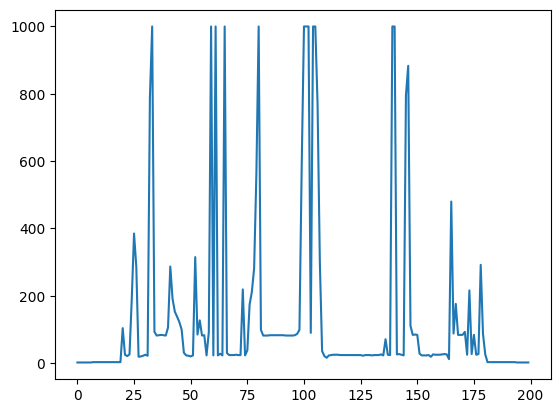

In [7]:
fig, ax = plt.subplots()
ax.plot(x1)
plt.show()

In [ ]:
for i in range(-100,100,1):
    x0 = np.array([1,i/10,1])
    eps = 0.1
    argmin, iter = conjugate_gradient(x0, eps)
    x2.append(iter)

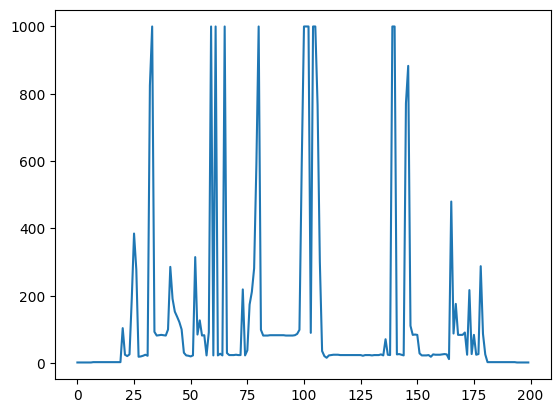

In [9]:
fig, ax = plt.subplots()
ax.plot(x2)
plt.show()

In [ ]:
for i in range(-100,100,1):
    x0 = np.array([1,1,i/10])
    eps = 0.1
    argmin, iter = conjugate_gradient(x0, eps)
    x3.append(iter)


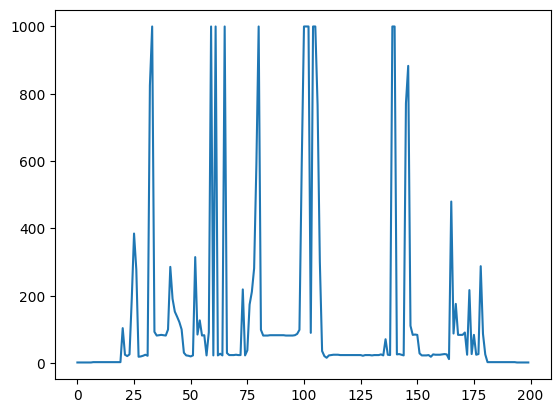

In [11]:
fig, ax = plt.subplots()
ax.plot(x2)
plt.show()

In [12]:
table = np.empty(4*50, dtype=object)
table = table.reshape(50,4)

In [13]:
for i in range(50):
    x0 = (i+1, i+1, i+1)
    eps = 0.1
    argmin, iter = conjugate_gradient(x0, eps)
    table[i][0] = x0
    table[i][1] = argmin
    table[i][2] = target_function(argmin)
    table[i,3] = iter

df = pd.DataFrame(table)
df


,0,1,2,3
0,"(1, 1, 1)","[1.0046514145947991, 1.0046514121972823, 1.004...",2.985846,16
1,"(2, 2, 2)","[1.004653884676702, 1.0046538835230838, 1.0046...",2.985846,18
2,"(3, 3, 3)","[0.037881765429879394, 0.03788176775071719, 0....",11.772946,46
3,"(4, 4, 4)","[0.03802065687537633, 0.038020647396655886, 0....",11.772946,60
4,"(5, 5, 5)","[-0.9846455582475794, -0.9846455640980661, -0....",26.864776,31
5,"(6, 6, 6)","[1.0046485400246303, 1.0046484252084864, 1.004...",2.985847,21
6,"(7, 7, 7)","[-0.984642156754045, -0.9846421648536536, -0.9...",26.864776,31
7,"(8, 8, 8)","[0.037877944901238796, 0.037878994670249105, 0...",11.772946,63
8,"(9, 9, 9)","[-2.2460763535585976e+42, -2.246091965345221e+...",2002985151129639692451754884872458841492797441...,3
9,"(10, 10, 10)","[54590238.976642914, 54590238.976642914, 54590...",4128711826921586356351762683631568413689257132...,2


In [14]:
xd = []

In [15]:
lr = range(1,100,2)
x0 = np.array([1.1,1,1])
eps = 0.0001
for i in range(len(lr)):
    argmin, iter = conjugate_gradient(x0=x0, tol=eps, lr=i/1000)
    xd.append(iter)
    

In [16]:
xd

[1000,
 13,
 8,
 8,
 8,
 8,
 7,
 7,
 8,
 7,
 7,
 7,
 8,
 7,
 8,
 8,
 8,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 8,
 7,
 8,
 7,
 8,
 8,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 8,
 7,
 8,
 7,
 8,
 8,
 7,
 8,
 8,
 8]

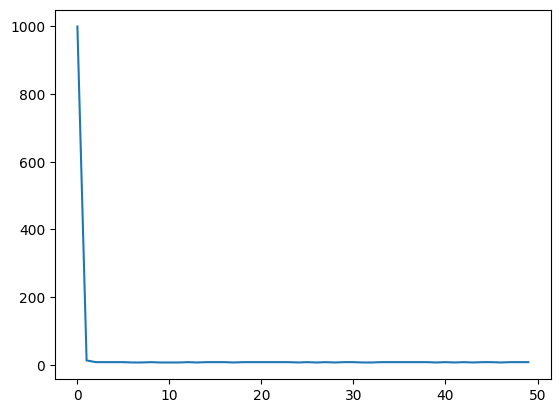

In [17]:
fig, ax = plt.subplots()
ax.plot(xd)
plt.show()

In [18]:
x0 = np.array([2,2,2])
eps = 0.00001
argmin, iter = conjugate_gradient(x0, tol=eps)
print(argmin, iter)
print(target_function(argmin)) #Это ответ если критерий остановки по норме градиента

[1.0046857 1.0046857 1.0046857] 53
2.9858456446282844


In [21]:
x0 = np.array([2,2,2])
eps = 0.000000000000000000000000000000001
argmin, iter = conjugate_gradient(x0, tol=eps, stop='1')
print(argmin, iter)
print(target_function(argmin)) #Это ответ если критерий по разности

[0.99855561 0.99855561 0.99855561] 1
3.0099688244219114
